<a href="https://colab.research.google.com/github/john-s-butler-dit/Numerical-Analysis-Python/blob/master/Chapter%2002%20-%20Higher%20Order%20Methods/202_Taylor%20Method%20Error%20Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1st vs 2nd order Taylor methods

## Intial Value Poblem
The general form of the population growth differential equation
\begin{equation} y^{'}=t-y, \ \ (0 \leq t \leq 4), \end{equation}
with the initial condition
\begin{equation}x(0)=1, \end{equation}
For N=4
with the analytic (exact) solution
\begin{equation} y= 2e^{-t}+t+1. \end{equation}

## Taylor Solution

\begin{equation} f(t,y)=t-y,  \end{equation}
differentiate with respect to $t$,
\begin{equation} f'(t,y)=1-y'=1-t+y,  \end{equation}
This gives the first order Taylor,
\begin{equation}T^1(t_i,w,i)=f(t_i,w_i)=t_i-w_i, \end{equation}
and the second order Taylor,
\begin{equation}
T^2(t_i,w,i)=f(t_i,w_i)+\frac{h}{2}f'(t_i,w_i)=t_i-w_i+\frac{h}{2}(1-t_i+w_i).\end{equation}

The first order Taylor difference equation, which is identical to the Euler method, is

\begin{equation}
w_{i+1}=w_i+h(t_i-w_i).  \end{equation}
The second order Taylor difference equation is
\begin{equation}
w_{i+1}=w_i+h(t_i-w_i+\frac{h}{2}(1-t_i+w_i)).  \end{equation}

In [1]:
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")


In [2]:
def Second_order_taylor(N,IC):
    x_end=4
    x_start=0
    
    INTITIAL_CONDITION=IC
    h=x_end/(N)
    N=N+1;
    Numerical_Solution=np.zeros(N)
    Numerical_Solution_first=np.zeros(N)
    t=np.zeros(N)
    Analytic_Solution=np.zeros(N)
    Upper_bound=np.zeros(N)
    
    t[0]=x_start
    Numerical_Solution[0]=INTITIAL_CONDITION
    Numerical_Solution_first[0]=INTITIAL_CONDITION
    Analytic_Solution[0]=INTITIAL_CONDITION
    for i in range (1,N):
        Numerical_Solution_first[i]=Numerical_Solution_first[i-1]+h*(t[i-1]-Numerical_Solution_first[i-1])
        Numerical_Solution[i]=Numerical_Solution[i-1]+h*(t[i-1]-Numerical_Solution[i-1]+h/2*(1-t[i-1]+Numerical_Solution[i-1]))
        t[i]=t[i-1]+h
        Analytic_Solution[i]=2*math.exp(-t[i])+t[i]-1
    

    fig = plt.figure(figsize=(10,4))
    # --- left hand plot
    ax = fig.add_subplot(1,3,1)
    plt.plot(t,Numerical_Solution,color='blue',label='Second Order')
    plt.plot(t,Numerical_Solution_first,color='red',label='First Order')
    plt.legend(loc='best')
    plt.title('Numerical Solution h=%s'%(h))

    # --- right hand plot
    ax = fig.add_subplot(1,3,2)
    plt.plot(t,Analytic_Solution,color='blue')
    plt.title('Analytic Solution')

    #ax.legend(loc='best')
    ax = fig.add_subplot(1,3,3)
    plt.plot(t,np.abs(Analytic_Solution-Numerical_Solution),color='blue',label='Second Order Error')
    plt.plot(t,np.abs(Analytic_Solution-Numerical_Solution_first),color='red',label='First Order Error')
    plt.title('Error')
    plt.legend(loc='best')
    # --- title, explanatory text and save
    
   
    # --- title, explanatory text and save
    fig.suptitle(r"$y'=y-t$", fontsize=20)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)    

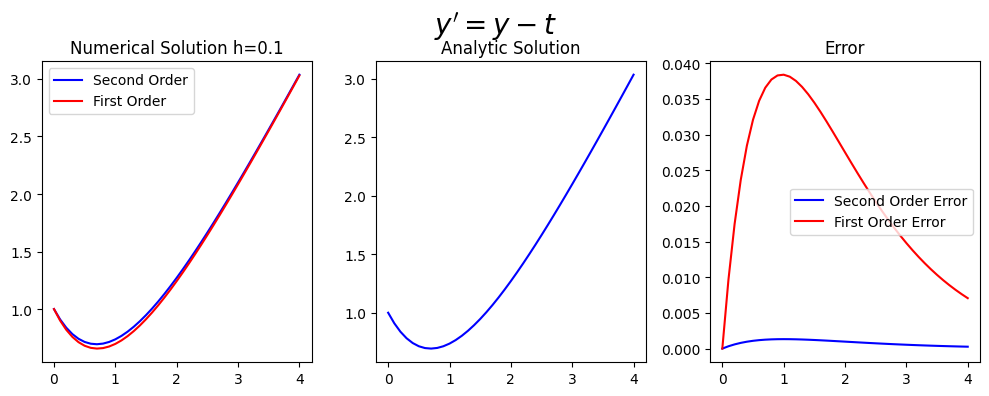

In [3]:
Second_order_taylor(40,1)